In [1]:
## Lab_7_2_Zhoomart_Koshoybekov 

In [2]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import matplotlib.pyplot as plt
import numpy as np


In [3]:

reviews = [
    "Отличный ресторан с вкусной кухней и приветливым персоналом. Обязательно рекомендую!",
    "Очень атмосферное место с прекрасным видом на город. Еда тоже очень понравилась.",
    "Не рекомендую этот ресторан. Еда была невкусной, а обслуживание - медленным.",
    "Уютный ресторан с домашней кухней. Персонал очень внимательный и доброжелательный.",
    "Отличная пицца и паста. Порции большие, цены приемлемые.",
    "Ресторан в центре города. Атмосфера немного пафосная, но еда вкусная.",
    "Недорогой ресторан с разнообразным меню. Еда в целом неплохая, но обслуживание могло бы быть лучше.",
    "Ресторан с экзотической кухней. Еда интересная, но на любителя.",
    "Отличный ресторан для семейного отдыха. Детское меню отличное, а аниматоры очень веселые.",
    "Ресторан с панорамным видом на город. Еда средняя, а вот вид - потрясающий!",
    "Ресторан с живой музыкой. Атмосфера очень приятная, но еда немного дороговата.",
    "Ресторан с интересным интерьером. Еда вкусная, а обслуживание отличное.",
    "Ресторан с традиционной русской кухней. Еда аутентичная, но порции небольшие.",
    "Ресторан с авторскими блюдами. Еда оригинальная, но не всем понравится.",
    "Ресторан с летним садом. Атмосфера очень уютная, а еда вкусная.",
    "Ресторан с доставкой на дом. Еда вкусная, но цены немного выше, чем в обычных ресторанах.",
    "Ресторан с вегетарианским меню. Еда разнообразная и вкусная.",
    "Ресторан с халяль-кухней. Еда соответствует всем религиозным требованиям.",
    "Ресторан с диетическим меню. Еда полезная и вкусная.",
    "Ресторан с детским меню. Еда разнообразная и безопасная для детей.",
    "Ресторан с бизнес-ланчем. Цены очень доступные, а еда вкусная.",
    "Ресторан с банкетным залом. Отличное место для проведения праздников.",
    "Ресторан с караоке. Отличное место для вечеринок.",
    "Ресторан с кальяном. Отличное место для отдыха с друзьями.",
    "Ресторан с террасой. Отличное место для отдыха на свежем воздухе.",
]

In [4]:
# Создаем пустой список для хранения отдельных слов из отзывов
# Итерируемся по каждому отзыву в списке отзывов
# Используем Counter из библиотеки collections для подсчета частоты каждого слова
# Выводим 10 наиболее часто встречающихся слов

words = []
for review in reviews:
    words += review.split()

word_counts = collections.Counter(words)
print(word_counts.most_common(10))

[('с', 22), ('Ресторан', 18), ('Еда', 13), ('но', 7), ('и', 6), ('очень', 6), ('а', 6), ('для', 6), ('место', 5), ('на', 5)]


In [5]:
# Создаем объект CountVectorizer
# Используем метод fit_transform для преобразования списка отзывов в матрицу счетчиков
# Выводим размерность полученной матрицы

vect = CountVectorizer()
X = vect.fit_transform(reviews)

print(X.shape)

(25, 116)


In [6]:
# Создаем объект LatentDirichletAllocation с указанием количества тем (n_components) и других параметров
# Применяем LDA к матрице X, которую мы получили из CountVectorizer

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)

In [7]:
# Выводим размерность массива, представляющего распределение слов по темам
lda.components_.shape

(10, 116)

In [8]:
# Получаем индексы отсортированных слов для каждой темы в порядке убывания вероятности
# Получаем имена признаков (слов) из CountVectorizer

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [9]:
# Диапазон номеров тем, в данном случае, от 0 до 9  
# Имена признаков (слов) из CountVectorizer
# Порядок сортировки слов для каждой темы
# Количество тем на каждый блок вывода
# Количество топовых слов для каждой темы

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
атмосфера     ресторан      ресторан      ресторан      еда           
очень         для           еда           кухней        ресторан      
но            место         вкусная       рекомендую    обслуживание  
еда           отличное      для           отличный      меню          
немного       разнообразная очень         обязательно   не            
дороговата    на            отличное      персоналом    но            
музыкой       свежем        место         приветливым   недорогой     
живой         воздухе       на            вкусной       быть          
приятная      террасой      атмосфера     домашней      бы            
ресторан      караоке       меню          доброжелательныйлучше         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
ре

In [10]:
# Создаем объект LatentDirichletAllocation с указанием количества тем (n_components) равным 100 и других параметров
# Применяем LDA к матрице X, которую мы получили из CountVectorizer

lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

In [11]:
# Задаем массив номеров тем, которые мы хотим рассмотреть более подробно
# Получаем порядок сортировки слов для каждой темы
# Получаем имена признаков (слов) из CountVectorizer
# Используем функцию print_topics из mglearn для вывода топовых слов для выбранных тем
# topics - диапазон номеров тем, feature_names - имена признаков (слов),
# sorting - порядок сортировки слов для каждой темы, topics_per_chunk - количество тем на каждый блок вывода,
# n_words - количество топовых слов для каждой темы

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
место         этот          этот          этот          этот          этот          ресторан      
кальяном      обслуживание  интересная    интересная    интересная    интересная    вкусная       
для           ресторан      диетическим   диетическим   диетическим   диетическим   еда           
ресторан      рекомендую    для           для           для           для           города        
друзьями      была          доброжелательныйдоброжелательныйдоброжелательныйдоброжелательныйно            
отдыха        еда           дом           дом           дом           дом           немного       
отличное      невкусной     домашней      домашней      домашней      домашней      пафосная      
ланчем        не            дороговата    дороговата    дороговата    дороговата    центре        
лю

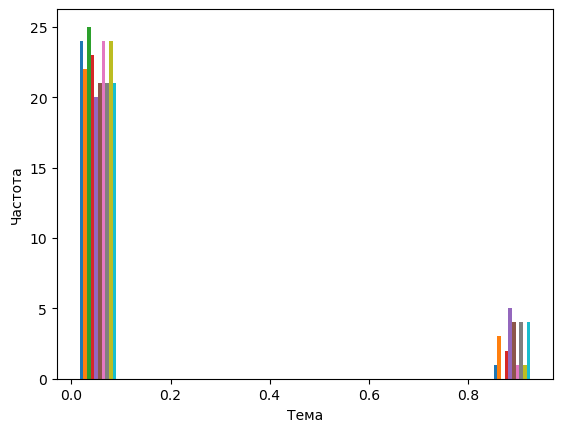

In [12]:
# График распределения тем по документам: этот график показывает, 
# как часто каждая тема встречается в документах. 
# Он может быть использован для оценки важности каждой темы.
plt.hist(document_topics, bins=10)
plt.xlabel("Тема")
plt.ylabel("Частота")
plt.show()

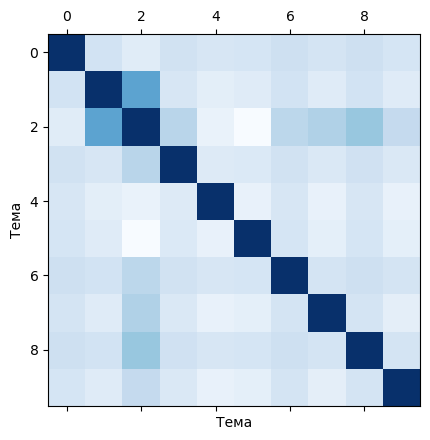

In [13]:
# График корреляции тем: этот график показывает, насколько тесно связаны друг с другом различные темы. 
# Он может быть использован для выявления групп тем, которые связаны между собой.
correlation = np.corrcoef(document_topics.T)

plt.matshow(correlation, cmap="Blues")
plt.xlabel("Тема")
plt.ylabel("Тема")
plt.show()

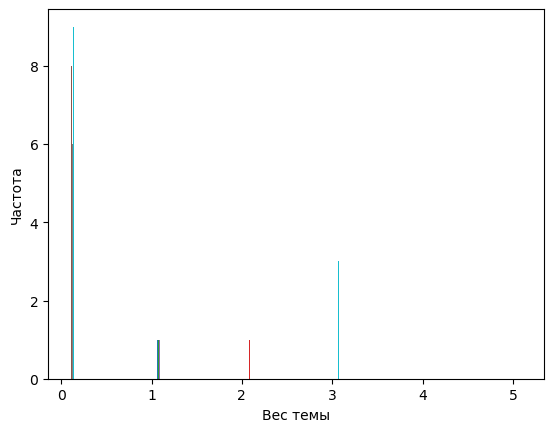

In [14]:
# График распределения весов тем: этот график показывает, как веса тем распределяются по значениям. 
# Он может быть использован для оценки того, насколько сильно каждая тема выражена в документах.
plt.hist(lda.components_, bins=100)
plt.xlabel("Вес темы")
plt.ylabel("Частота")
plt.show()

Выводы

Мешок слов - это простой и эффективный способ представления текстовых данных. Он может быть использован для различных задач обработки естественного языка, таких как классификация, кластеризация и тематическое моделирование.

TF-IDF представляет собой эффективный метод представления текстовых данных, учитывающий важность слов в контексте всего корпуса. Этот подход может быть применен для разнообразных задач обработки естественного языка, включая классификацию, кластеризацию и тематическое моделирование.

В данном контексте, TF-IDF может быть использован для анализа отзывов о ресторанах. Например, с его помощью можно выявить, какие слова оказывают наибольшее влияние на восприятие посетителями ресторанов в Санкт-Петербурге.